In [4]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

In [5]:
# Read the data
mobile = pd.read_csv("train.csv")
mobile.head(6)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1


In [6]:
mobile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [7]:
mobile.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [8]:
# Set the features as the input and the price range as the output
X = mobile.drop("price_range", axis=1)
y = mobile["price_range"]

# Split data into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=9)

In [9]:
 # Logistic Regression
clf = LogisticRegression(random_state=9, solver="lbfgs", max_iter=1000)
clf.fit(X_train, y_train)

clf_acc = clf.score(X_test, y_test)
print("Logistic regression accuracy:", clf_acc)

Logistic regression accuracy: 0.705


C:\Users\m4sil\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
# Decision Tree Classifier
dtc = DecisionTreeClassifier(criterion="entropy", max_depth=10, random_state=9)
dtc.fit(X_train, y_train)

dtc_acc = dtc.score(X_test, y_test)
print("Decision tree classifier accuracy:", dtc_acc)

Decision tree classifier accuracy: 0.8625


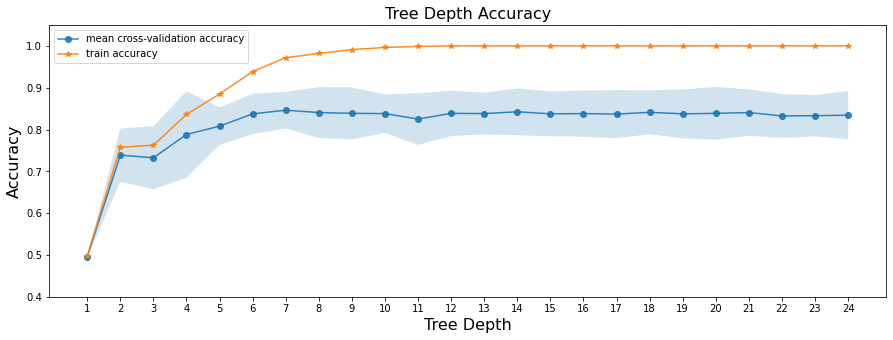

In [11]:
# DTC: Function for fitting tree depths using cross-validation
def cross_validation(X, y, tree_depths, cv=5, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(max_depth=depth)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores
  
# Function for plotting
def plot_cross_validation(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim(0.4,1.05)
    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree Depth', fontsize=16)
    ax.set_ylabel('Accuracy', fontsize=16)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

# Fitting trees depth 1 to 24
sm_tree_depths = range(1,25)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = cross_validation(X_train, y_train, sm_tree_depths)

# Plotting the accuracy
plot_cross_validation(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, "Tree Depth Accuracy")

In [12]:
# Random Forest Classifier
rfc = RandomForestClassifier(max_depth=12, n_estimators=100, random_state=9)
rfc.fit(X_train, y_train)

rfc_acc = rfc.score(X_test, y_test)
print("Random forest classifier accuracy:", rfc_acc)

Random forest classifier accuracy: 0.895


In [19]:
# Ada Boosting Classifier
ada = AdaBoostClassifier(random_state=9)
ada.fit(X_train, y_train)

ada_acc = ada.score(X_test, y_test)
print("Ada boost classifier accuracy:", ada_acc)

Ada boost classifier accuracy: 0.6725


In [15]:
# Gradient Boosting Decision Tree Classifier
gbdt = GradientBoostingClassifier(random_state=9)
gbdt.fit(X_train, y_train)

gbdt_acc = gbdt.score(X_test, y_test)
print("Gradient boosting classifier accuracy:", gbdt_acc)

Gradient boosting classifier accuracy: 0.8975


In [16]:
# SVM (support vector machine)
from sklearn.svm import SVC
svm = SVC(random_state=9)
svm.fit(X_train, y_train)

svm_acc = svm.score(X_test, y_test)
print("SVC accuracy:", svm_acc)

SVC accuracy: 0.9525


In [17]:
import sys
from sklearn import svm, model_selection

clf = svm.SVC(random_state = 9)
scoreSet = model_selection.cross_val_score(clf, X_train, y_train, cv = 10)
print("Cross validaion test: ", scoreSet)
print("ms_cvScore : {0}%".format(int(sum(scoreSet)/10*100)))

Cross validaion test:  [0.94375 0.94375 0.9875  0.9625  0.975   0.9625  0.94375 0.9375  0.9375
 0.925  ]
ms_cvScore : 95%


In [35]:
# K-nearest neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

knn_acc = knn.score(X_test, y_test)
print("K-nearest neighbors accuracy:", knn_acc)

K-nearest neighbors accuracy: 0.9275
